In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('drive/MyDrive/datasets/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
X.shape

(10000, 11)

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[0:5]

array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
         0.64920267,  0.97481699,  1.36766974, -0.57946723, -0.57638802,
         0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
         0.64920267,  0.97481699,  1.6612541 ,  1.72572313, -0.57638802,
         0.91324755],
       [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.91668767,
         0.64920267, -1.02583358, -0.25280688, -0.57946723,  1.73494238,
         0.91324755],
       [-0.94071667, -1.13114808,  1.38675281,  0.95321202, -0.91668767,
         0.64920267, -1.02583358,  0.91539272, -0.57946723, -0.57638802,
        -1.09499335],
       [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
        -1.54035103, -1.02583358, -1.05960019, -0.57946723, -0.57638802,
         0.91324755]])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7074 - loss: 0.5909 - val_accuracy: 0.8112 - val_loss: 0.4592
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8093 - loss: 0.4532 - val_accuracy: 0.8269 - val_loss: 0.4239
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4418 - val_accuracy: 0.8313 - val_loss: 0.4068
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: 0.4083 - val_accuracy: 0.8388 - val_loss: 0.3932
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.3970 - val_accuracy: 0.8475 - val_loss: 0.3811
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8458 - loss: 0.3748 - val_accuracy: 0.8506 - val_loss: 0.3709
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3498 - val_accuracy: 0.8494 - val_loss: 0.3640
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3674 - val_accu

In [ ]:
# The values of weights and bais in first layer
model.layers[0].get_weights()

[array([[-2.99647480e-01,  2.09736913e-01, -2.34384224e-01,
          7.59080937e-03,  1.06944945e-02, -3.01861376e-01,
         -2.54789945e-02, -3.13380182e-01,  7.10764527e-02,
         -7.45579004e-02, -8.00115392e-02],
        [ 7.82051563e-01, -7.42542624e-01, -9.79757369e-01,
         -3.89572263e-01,  8.41307998e-01, -3.64970509e-03,
          3.16820145e-01, -4.45090860e-01,  6.43591404e-01,
         -3.94925654e-01,  4.50832665e-01],
        [ 3.69157121e-02, -1.40359700e-01,  2.14114375e-02,
         -5.34459949e-02, -4.04282846e-02, -2.14737803e-02,
         -1.20388724e-01, -1.32072315e-01, -5.89509085e-02,
         -6.54113710e-01,  1.26327397e-02],
        [-2.29607284e-01,  3.60685468e-01, -1.56214982e-01,
         -6.52652144e-01, -2.47878339e-02,  7.19781339e-01,
          3.29871505e-01,  3.99962008e-01,  2.38514543e-02,
         -3.77328992e-01, -1.13380469e-01],
        [-5.07828236e-01, -7.15172663e-02,  5.01706958e-01,
         -5.42285204e-01, -7.50317454e-01,  

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861

In [ ]:
history

In [ ]:
history.history

{'accuracy': [0.7668750286102295,
  0.8068749904632568,
  0.8193749785423279,
  0.8298437595367432,
  0.8384374976158142,
  0.8457812666893005,
  0.8515625,
  0.8568750023841858,
  0.8568750023841858,
  0.8603125214576721,
  0.8598437309265137,
  0.860156238079071,
  0.8621875047683716,
  0.8629687428474426,
  0.862500011920929,
  0.864062488079071,
  0.8626562356948853,
  0.8645312786102295,
  0.8651562333106995,
  0.8660937547683716,
  0.8650000095367432,
  0.8657812476158142,
  0.8654687404632568,
  0.8665624856948853,
  0.8665624856948853,
  0.8650000095367432,
  0.8676562309265137,
  0.8673437237739563,
  0.8678125143051147,
  0.8665624856948853,
  0.8665624856948853,
  0.8662499785423279,
  0.8662499785423279,
  0.8675000071525574,
  0.866406261920929,
  0.8668749928474426,
  0.8656250238418579,
  0.8671875,
  0.8656250238418579,
  0.8662499785423279,
  0.8660937547683716,
  0.8660937547683716,
  0.8651562333106995,
  0.8673437237739563,
  0.8670312762260437,
  0.8656250238418579

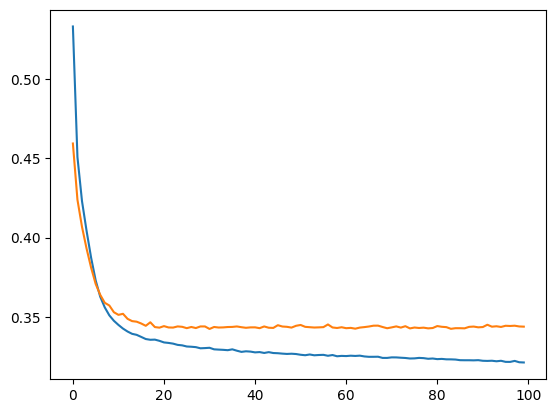

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

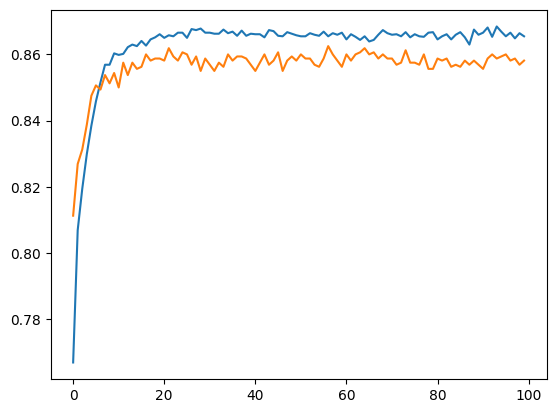

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])